<a href="https://colab.research.google.com/github/Guylord/Breast-Cancer-Classification/blob/main/Breast_Cancer_Classification_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
#Breast Cancer Wisconsin (Diagnostic) dataset- Metadata
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
print(breast_cancer_wisconsin_diagnostic.metadata)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [3]:
#Dataset loading
df = pd.read_csv('https://archive.ics.uci.edu/static/public/17/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

In [4]:
#Distribution of the target variable
df['Diagnosis'].value_counts()

,count
Diagnosis,
B,357
M,212


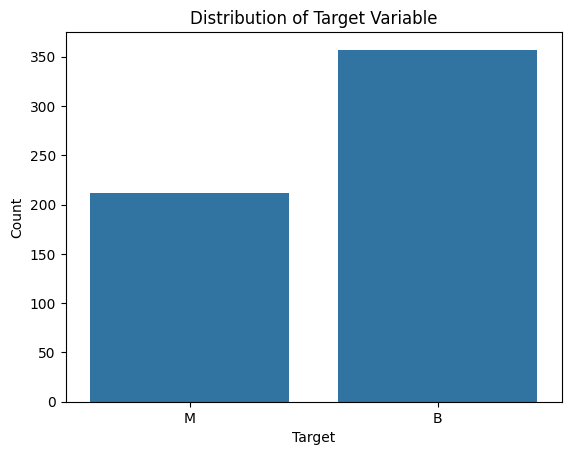

In [5]:
#Distribution of the target variable
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [11]:
#Variables
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (569, 31)
y shape: (569,)


In [12]:
#Train-Test split
random_state=925

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#Model building
model = Sequential()

model.add(Dense(128, input_dim=30, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,281 (51.88 KB)

 Trainable params: 13,281 (51.88 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)
callbacks=[early_stopping, reduce_lr]

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=32,
                    callbacks=callbacks)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 30, but received input with shape (None, 31)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 31), dtype=float32)
  • training=True
  • mask=None

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.6709 - loss: 0.6161 - val_accuracy: 0.9737 - val_loss: 0.2305 - learning_rate: 0.0010
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9184 - loss: 0.2452 - val_accuracy: 0.9825 - val_loss: 0.1005 - learning_rate: 0.0010
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9516 - loss: 0.1563 - val_accuracy: 0.9825 - val_loss: 0.0676 - learning_rate: 0.0010
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9728 - loss: 0.0961 - val_accuracy: 0.9825 - val_loss: 0.0460 - learning_rate: 0.0010
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9832 - loss: 0.0710 - val_accuracy: 0.9825 - val_loss: 0.0413 - learning_rate: 0.0010
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9729 - loss: 0.0658 - val_accuracy: 0.9825 - val_loss: 0.0402 - learning_rate: 0.0010
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9814 - loss: 0.0499 - val_accur

In [ ]:
val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Loss: 0.0247
Validation Accuracy: 1.0000


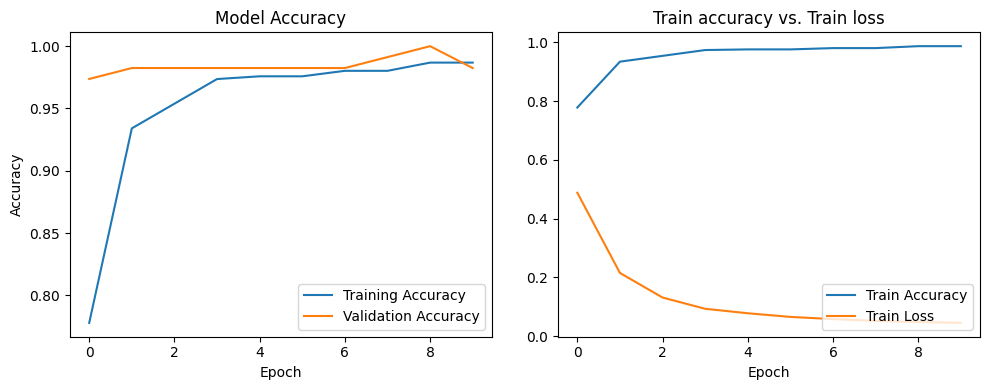

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Train accuracy vs. Train loss')
plt.xlabel('Epoch')
plt.ylabel(' ')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
def create_model(optimizer='adam', activation='relu'):
  model = Sequential()
  model.add(Dense(128, input_dim=30, activation=activation))
  model.add(Dense(64, activation=activation))
  model.add(Dense(16, activation=activation))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)
params = dict(optimizer=['sgd', 'adam'],
              # Move activation to model parameters
              model__activation=['relu', 'tanh'],
              epochs=[2, 3, 4, 5],
              batch_size=[8, 16, 32, 64])

from sklearn.model_selection import RandomizedSearchCV
rand = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5)
rand_result = rand.fit(X_train, y_train)

print("Best: %f using %s" % (rand_result.best_score_, rand_result.best_params_))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Best: 0.973626 using {'optimizer': 'adam', 'model__activation': 'relu', 'epochs': 5, 'batch_size': 8}


In [ ]:
def create_model(optimizer='sgd', activation='tanh', num_layers=1, num_neurons=64):
  model = Sequential()
  model.add(Dense(num_neurons, input_dim=30, activation=activation))
  for _ in range(num_layers - 1):
    model.add(Dense(num_neurons, activation=activation))
  model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)
params = dict(model__num_layers=[1, 2, 3, 4], model__num_neurons=[16, 32, 64, 128])
rand = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5)
rand_result = rand.fit(X_train, y_train)

print("Best: %f using %s" % (rand_result.best_score_, rand_result.best_params_))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Best: 0.929670 using {'model__num_neurons': 128, 'model__num_layers': 2}


In [ ]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
model = Sequential()

# Input
model.add(Dense(128, input_dim=30, activation='tanh'))

# Hidden
model.add(Dense(64, activation='tanh'))
model.add(Dense(16, activation='tanh'))

# Output
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)
#callbacks=[early_stopping, reduce_lr]

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=32)#,
                    #callbacks=callbacks)

val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8550 - loss: 0.3870 - val_accuracy: 0.9649 - val_loss: 0.0832
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9663 - loss: 0.1164 - val_accuracy: 0.9912 - val_loss: 0.0460
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9796 - loss: 0.0849 - val_accuracy: 0.9912 - val_loss: 0.0345
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9731 - loss: 0.0808 - val_accuracy: 0.9912 - val_loss: 0.0320
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9797 - loss: 0.0657 - val_accuracy: 0.9912 - val_loss: 0.0280
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9791 - loss: 0.0623 - val_accuracy: 1.0000 - val_loss: 0.0218
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9785 - loss: 0.0805 - val_accuracy: 1.0000 - val_loss: 0.0197
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9824 - loss: 0.0776 - val_accuracy: 1.0000 - val_loss: 0.0204
Ep